In [ ]:
!pip install torch torchvision matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 28.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Transform to tensor and normalize
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
batch_size = 64
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Check dataset shape
print("Image Shape:", train_dataset[0][0].shape)  # (1, 28, 28)


100%|██████████| 9.91M/9.91M [00:00<00:00, 19.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.20MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.8MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.17MB/s]

Image Shape: torch.Size([1, 28, 28])


In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),  # 28x28 = 784
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        return img.view(-1, 1, 28, 28)

# Initialize Generator
generator = Generator()


In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        return self.model(img_flat)

# Initialize Discriminator
discriminator = Discriminator()


In [ ]:
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)


In [ ]:
epochs = 20  # Number of epochs
for epoch in range(epochs):
    for i, (real_imgs, _) in enumerate(train_loader):
        batch_size = real_imgs.shape[0]

        # Labels
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Train Discriminator
        optimizer_D.zero_grad()
        real_preds = discriminator(real_imgs)
        real_loss = criterion(real_preds, real_labels)

        z = torch.randn(batch_size, 100)  # Random noise
        fake_imgs = generator(z)
        fake_preds = discriminator(fake_imgs.detach())
        fake_loss = criterion(fake_preds, fake_labels)

        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        fake_preds = discriminator(fake_imgs)
        g_loss = criterion(fake_preds, real_labels)
        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {d_loss:.4f} | G Loss: {g_loss:.4f}")


Epoch [1/20] | D Loss: 1.2261 | G Loss: 2.4265
Epoch [2/20] | D Loss: 2.4441 | G Loss: 0.6354
Epoch [3/20] | D Loss: 0.3749 | G Loss: 3.0372
Epoch [4/20] | D Loss: 0.5388 | G Loss: 2.3751
Epoch [5/20] | D Loss: 0.0850 | G Loss: 4.0018
Epoch [6/20] | D Loss: 0.6163 | G Loss: 5.8852
Epoch [7/20] | D Loss: 0.5917 | G Loss: 2.7044
Epoch [8/20] | D Loss: 0.4582 | G Loss: 3.3490
Epoch [9/20] | D Loss: 0.3391 | G Loss: 3.3168
Epoch [10/20] | D Loss: 0.2732 | G Loss: 4.1965
Epoch [11/20] | D Loss: 0.7693 | G Loss: 2.9870
Epoch [12/20] | D Loss: 0.4926 | G Loss: 2.8755
Epoch [13/20] | D Loss: 0.6666 | G Loss: 2.9749
Epoch [14/20] | D Loss: 0.3718 | G Loss: 2.6482
Epoch [15/20] | D Loss: 0.5560 | G Loss: 2.8111
Epoch [16/20] | D Loss: 0.5924 | G Loss: 1.8909
Epoch [17/20] | D Loss: 0.3302 | G Loss: 2.9582
Epoch [18/20] | D Loss: 0.7584 | G Loss: 2.5939
Epoch [19/20] | D Loss: 0.3036 | G Loss: 2.4476
Epoch [20/20] | D Loss: 0.9123 | G Loss: 2.5944


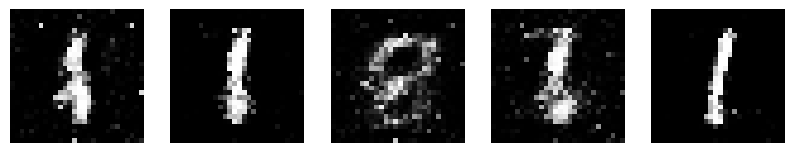

In [ ]:
# Generate 5 fake images
z = torch.randn(5, 100)
fake_imgs = generator(z).detach().numpy()

# Plot the images
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(fake_imgs[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
plt.show()
